# Stage3

Stage3는 Stage2에 이어집니다. 아래는 Stage2에서 작성한 내용입니다.

---

In [102]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


---
#  Feature Engineering and Visualization

## 함께실습$2

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

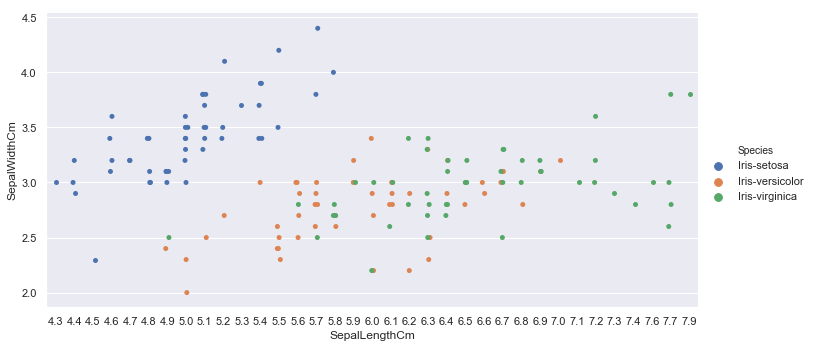

In [105]:
sns.catplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', aspect=2)

## 미션$1

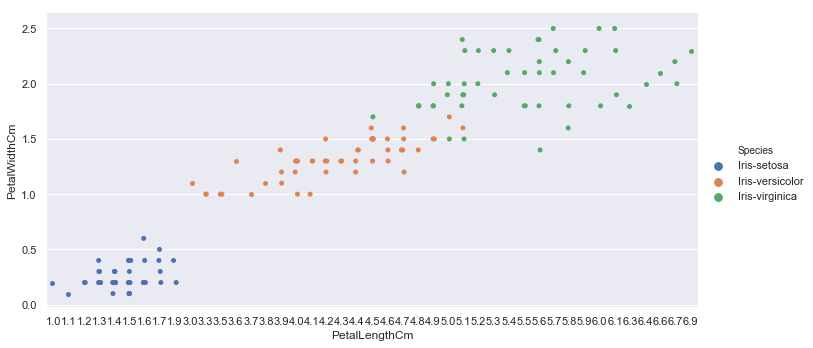

In [106]:
sns.catplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', aspect=2)

## 함께실습$3

/Volumes/External1/Envs/Conda/ds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


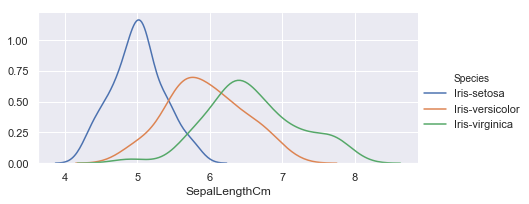

In [107]:
facet = sns.FacetGrid(df, hue="Species", aspect=2)
facet.map(sns.kdeplot, 'SepalLengthCm')
facet.add_legend()

plt.show()

## 함께실습$4

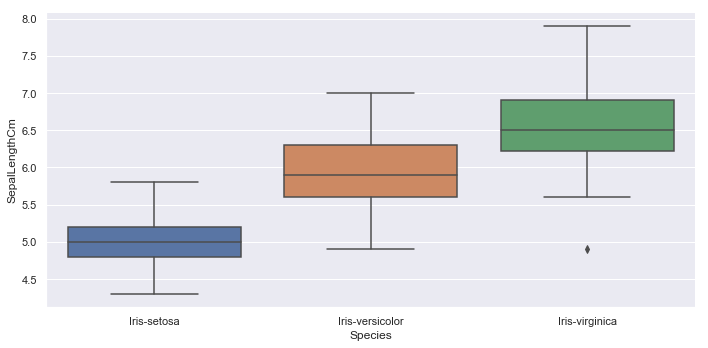

In [108]:
sns.catplot(kind='box', data=df, x='Species', y='SepalLengthCm', aspect=2)

## 함께실습$5

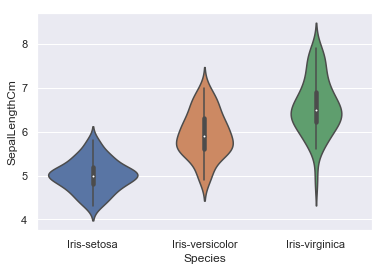

In [109]:
sns.violinplot(data=df, x='Species', y='SepalLengthCm')

## 함께실습$6

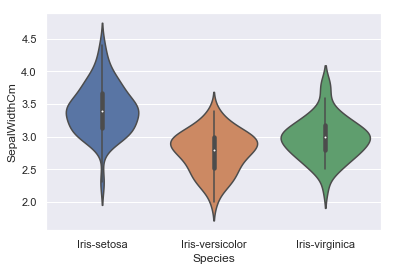

In [110]:
sns.violinplot(data=df, x='Species', y='SepalWidthCm')

## 함께실습$7

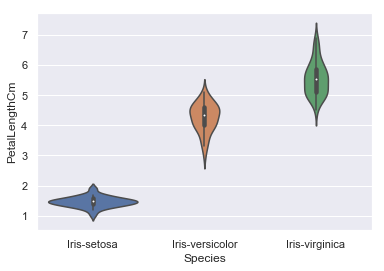

In [111]:
sns.violinplot(data=df, x='Species', y='PetalLengthCm')

## 함께실습$8

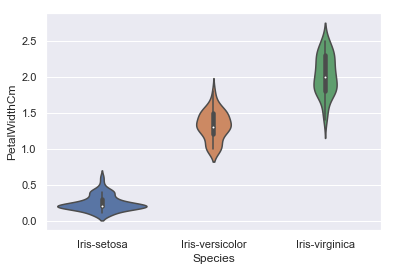

In [112]:
sns.violinplot(data=df, x='Species', y='PetalWidthCm')

---
# 여기서부터 Stage3가 시작됩니다.

---

## Modeling

## 함께실습$1

In [113]:
from sklearn.model_selection import train_test_split

train_data = df.drop('Species', axis=1)
target_data = df['Species']

#자동으로 75%, 25%로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data) 

print(train_data.shape, x_train.shape, x_test.shape)

(150, 5) (112, 5) (38, 5)


## 함께실습$2

In [171]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))
print('test set accuracy:', tree.score(x_test, y_test))

training set accuracy: 1.0
test set accuracy: 1.0


---
# Prediction

## 함께실습$3

In [115]:
prediction = tree.predict(x_test)
prediction

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

---
# Random Forest로 해보기

## 함께실습$4

In [133]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train, y_train)

print('training set accuracy:', forest.score(x_train, y_train))
print('test set accuracy:', forest.score(x_test, y_test))

prediction = forest.predict(x_test)
prediction

training set accuracy: 1.0
test set accuracy: 1.0


array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## 미션$1

In [172]:
result = pd.DataFrame({
    'Id': x_test['Id'],
    'Species': prediction
})

result.to_csv('data/result.csv', index=False)

my_prediction = pd.read_csv('data/result.csv')
my_prediction.head()

,Id,Species
0,94,Iris-versicolor
1,122,Iris-virginica
2,133,Iris-virginica
3,43,Iris-setosa
4,79,Iris-versicolor
